In [1]:
min=15
print(str(min)+'min')

15min


In [2]:
import codigo
from codigo import utils
from codigo import model_utils

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

# Importar Dataset depurado

In [4]:
df_Inicial = pd.read_csv(r'dataset/generado/datasetDepurado.csv')

# Revisamos las columnas que contiene el Dataset

In [5]:
df_Inicial.head()

,ID,Date,Glucose level
0,LIB193263,2020-06-09 19:08:00,99.0
1,LIB193263,2020-06-09 19:23:00,92.0
2,LIB193263,2020-06-09 19:38:00,86.0
3,LIB193263,2020-06-09 19:53:00,85.0
4,LIB193263,2020-06-09 20:08:00,85.0


In [6]:
df_Inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966685 entries, 0 to 2966684
Data columns (total 3 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ID             object 
 1   Date           object 
 2   Glucose level  float64
dtypes: float64(1), object(2)
memory usage: 67.9+ MB


### Cambiamos el formato de la columna Date de object a datetime64

In [7]:
df_Inicial['Date']=pd.to_datetime(df_Inicial['Date'])

In [8]:
df_Inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966685 entries, 0 to 2966684
Data columns (total 3 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ID             object        
 1   Date           datetime64[ns]
 2   Glucose level  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 67.9+ MB


In [9]:
df_Inicial['Date'].min()

Timestamp('2018-01-06 00:31:00')

In [10]:
df_Inicial['Date'].max()

Timestamp('2022-03-20 23:58:00')

In [11]:
df=df_Inicial

In [12]:
features=['Glucose level','Yt','hour','pod_id','level_id']

In [13]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))
scalerHours = load(open('dataset/generado/scalerHours.scaler', 'rb'))
scalerMin = load(open('dataset/generado/scalerMin.scaler', 'rb'))
scalerPodId = load(open('dataset/generado/scalerPodId.scaler', 'rb'))
scalerLevelId = load(open('dataset/generado/scalerLevelId.scaler', 'rb'))

# Generación de Dataset General

In [14]:
dfIDPacientesTrain = pd.read_csv(r'dataset/generado/IDs_Train.csv')
dfIDPacientesTrain

,ID
0,LIB193277
1,LIB193385
2,LIB193307
3,LIB193309
4,LIB193367
...,...
56,LIB193273
57,LIB193361
58,LIB193346
59,LIB193312


In [15]:
# Generamos train validation and test 
# ratio of training data set (85%, 10% for validation and 5% for testing)
train_share = 0.85
#ration of validation data set (10%)
val_share = 0.95 
lag=30
n_ahead=1

dfGen,array_Xtrain,array_Ytrain,array_Xval,array_Yval,array_Xtest,array_Ytest=model_utils.GenDataSet(df,features,dfIDPacientesTrain['ID'],15,train_share,val_share,lag,n_ahead,scalerHours,scalerMin,scalerGlucosa,scalerPodId,scalerLevelId)

In [16]:
len(array_Xtrain)

3404855

In [17]:
with open('dataset/generado/dataset15min/array_Xtrain.npy', 'wb') as f:
    np.save(f, array_Xtrain)

In [18]:
len(array_Ytrain)

3404855

In [19]:
with open('dataset/generado/dataset15min/array_Ytrain.npy', 'wb') as f:
    np.save(f, array_Ytrain)

In [20]:
len(array_Xval)

400571

In [21]:
with open('dataset/generado/dataset15min/array_Xval.npy', 'wb') as f:
    np.save(f, array_Xval)

In [22]:
len(array_Yval)

400571

In [23]:
with open('dataset/generado/dataset15min/array_Yval.npy', 'wb') as f:
    np.save(f, array_Yval)

In [24]:
len(array_Xtest)

200316

In [25]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'wb') as f:
    np.save(f, array_Xtest)

In [26]:
len(array_Ytest)

200316

In [27]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'wb') as f:
    np.save(f, array_Ytest)

In [28]:
dfGen

,Glucose level,Yt,hour,pod_id,level_id
Date,,,,,
2018-06-12 20:15:00,0.252174,0.000000,0.869565,0.6,0.5
2018-06-12 20:30:00,0.267391,0.015217,0.869565,0.6,0.5
2018-06-12 20:45:00,0.256522,-0.010870,0.869565,0.6,0.5
2018-06-12 21:00:00,0.276087,0.019565,0.913043,0.8,0.5
2018-06-12 21:15:00,0.215217,-0.060870,0.913043,0.8,0.5
...,...,...,...,...,...
2022-03-20 22:45:00,0.371739,-0.028261,0.956522,0.8,1.0
2022-03-20 23:00:00,0.343478,-0.028261,1.000000,0.8,1.0
2022-03-20 23:15:00,0.328261,-0.015217,1.000000,0.8,1.0


<AxesSubplot:>

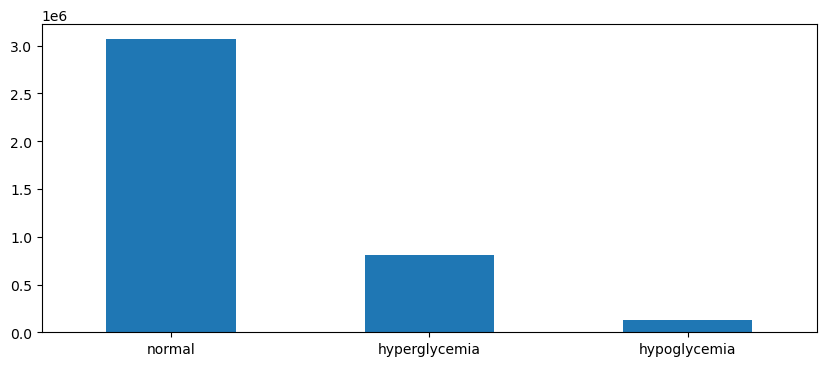

In [29]:
dfGen['level_label']= dfGen['level_id'].apply(utils.id_LevelBG_inverse_transform,scaler=scalerLevelId)
dfGen['level_label'].value_counts().plot.bar( rot=0,figsize=(10, 4))

<AxesSubplot:ylabel='level_label'>

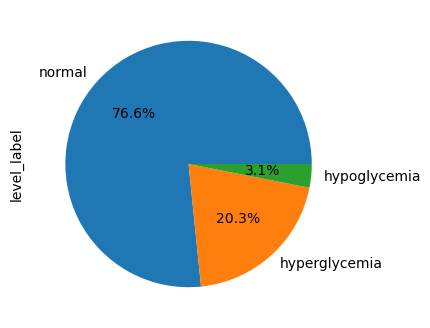

In [30]:
dfGen['level_label'].value_counts().plot.pie(y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))

<AxesSubplot:>

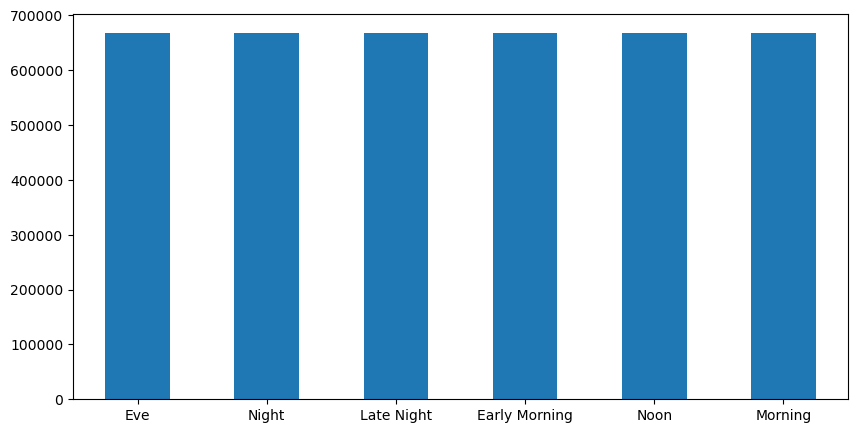

In [31]:
dfGen['pod_label']= dfGen['pod_id'].apply(utils.id_partOfDay_inverse_transform,scaler=scalerPodId)
dfGen['pod_label'].value_counts().plot.bar( rot=0,figsize=(10, 5))

<AxesSubplot:>

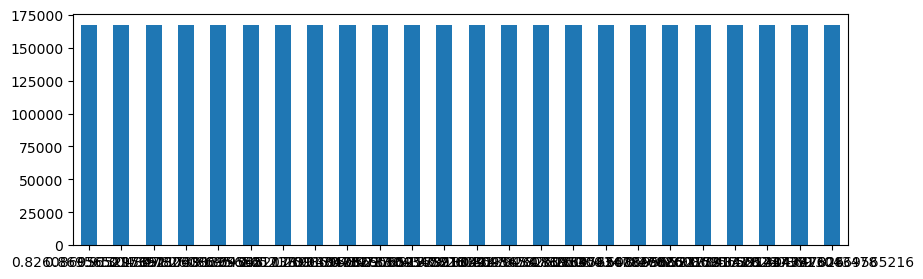

In [32]:
dfGen['hour'].value_counts().plot.bar( rot=0,figsize=(10, 3))